## Step 1: Importing

#### Import all necessary Python libraries, read in data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None
from IPython.display import HTML
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14



#import
shark_raw = pd.read_csv('data/Shark Attack Data.csv')


In [2]:
shark_raw.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,11-Jun-17,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,10-Jun-17,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,10-Jun-17,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,04-Jun-17,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0


## Step 2: Preparing

#### Remove unneeded variables


In [3]:
shark_col_clean = shark_raw.drop(['Case Number', 'Name', 'Investigator or Source', 
                                  'pdf', 'href formula', 'href', 'Injury', 'Location', 'Case Number.1', 'Case Number.2',
                                  'original order', 'Year'], axis=1)

#### Rename variable names that contain spaces or special characters

In [4]:
shark_col_clean.rename(columns={'Fatal (Y/N)': 'Fatal', 'Species ': 'Shark', 'Sex ':'Sex'}, inplace=True)

#### Filter to only United States attacks to simplify dataset

In [5]:
shark_usa = shark_col_clean[(shark_col_clean.Country == 'USA')]     

shark_usa = shark_usa.drop(['Country'], axis=1)



shark_usa.head(15)                  

,Date,Type,Area,Activity,Sex,Age,Fatal,Time,Shark
2,10-Jun-17,Unprovoked,Florida,Surfing,M,19,N,10h00,NaN
4,04-Jun-17,Unprovoked,Florida,Spearfishing,M,NaN,N,NaN,8' shark
6,30-May-17,Provoked,South Carolina,Touching a shark,F,20,N,NaN,3' shark
7,28-May-17,Unprovoked,Florida,Feeding sharks,M,NaN,N,Morning,Tiger shark
12,03-May-17,Invalid,California,Surfing,F,18,N,14h30,Shark involvement highly doubtful
13,29-Apr-17,Unprovoked,California,NaN,F,NaN,N,17h34,NaN
15,29-Apr-17,Unprovoked,South Carolina,Surfing,F,33,N,11h00,NaN
18,26-Apr-17,Invalid,Florida,Photo shoot,F,NaN,NaN,NaN,No shark invovlement - it ws a publicity stunt
20,20-Apr-17,Invalid,South Carolina,Swimming,M,NaN,N,08h50,Shark involvement not confirmed
21,17-Apr-17,Unprovoked,Florida,NaN,NaN,NaN,N,Afternoon,NaN


#### Identify missing data

In [6]:
print(shark_usa.isnull().sum())

Date          0
Type          2
Area          4
Activity    129
Sex         103
Age         696
Fatal         4
Time        818
Shark       941
dtype: int64


#### Replace null values with "Unknown" for Shark variable, but otherwise delete observations with any missing data

In [7]:
shark_usa.Shark.fillna(value='Unknown', inplace=True)

shark_usa1 = shark_usa.dropna()

shark_usa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 2 to 5992
Data columns (total 9 columns):
Date        1100 non-null object
Type        1100 non-null object
Area        1100 non-null object
Activity    1100 non-null object
Sex         1100 non-null object
Age         1100 non-null object
Fatal       1100 non-null object
Time        1100 non-null object
Shark       1100 non-null object
dtypes: object(9)
memory usage: 85.9+ KB


#### Check Fatal variable, make data consistent


In [8]:
shark_usa1['Fatal'].value_counts()

N          1035
Y            64
UNKNOWN       1
Name: Fatal, dtype: int64

In [9]:
shark_usa2 = shark_usa1[(shark_usa1.Fatal == 'N') | (shark_usa1.Fatal == 'Y')]

shark_usa2['Fatal'].value_counts()

N    1035
Y      64
Name: Fatal, dtype: int64

#### Check Type variable, make data consistent

In [10]:
shark_usa2['Type'].value_counts()

Unprovoked      986
Provoked         55
Invalid          48
Sea Disaster      6
Boat              4
Name: Type, dtype: int64

In [11]:
shark_usa3 = shark_usa2[(shark_usa2.Type != 'Invalid')]

shark_usa3.Type.replace('Sea Disaster', 'Unprovoked', inplace=True)
shark_usa3.Type.replace('Boat', 'Unprovoked', inplace=True)
shark_usa3['Type'].value_counts()

Unprovoked    996
Provoked       55
Name: Type, dtype: int64

#### From free form text in Activity field, use key words to categorize and mine the text to create Activity_Category, grouping similar activities together

In [12]:
shark_usa3.loc[shark_usa3['Activity'].str.contains('surf', case=False), 'Activity_category'] = 'Surfing'
shark_usa3.loc[shark_usa3['Activity'].str.contains('swim', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('wading', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('float', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('play', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('walk', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('bath', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('stand', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('paddle', case=False), 'Activity_category'] = 'Boarding'
shark_usa3.loc[shark_usa3['Activity'].str.contains('boogie', case=False), 'Activity_category'] = 'Boarding'
shark_usa3.loc[shark_usa3['Activity'].str.contains('body', case=False), 'Activity_category'] = 'Boarding'
shark_usa3.loc[shark_usa3['Activity'].str.contains('board', case=False), 'Activity_category'] = 'Boarding'
shark_usa3.loc[shark_usa3['Activity'].str.contains('snork', case=False), 'Activity_category'] = 'Snorkeling/Diving'
shark_usa3.loc[shark_usa3['Activity'].str.contains('scuba', case=False), 'Activity_category'] = 'Snorkeling/Diving'
shark_usa3.loc[shark_usa3['Activity'].str.contains('diving', case=False), 'Activity_category'] = 'Snorkeling/Diving'
shark_usa3.loc[shark_usa3['Activity'].str.contains('photo', case=False), 'Activity_category'] = 'Snorkeling/Diving'
shark_usa3.loc[shark_usa3['Activity'].str.contains('fishing', case=False), 'Activity_category'] = 'Fishing'
shark_usa3.loc[shark_usa3['Activity'].str.contains('raft', case=False), 'Activity_category'] = 'Boating'
shark_usa3.loc[shark_usa3['Activity'].str.contains('boat', case=False), 'Activity_category'] = 'Boating'
shark_usa3.loc[shark_usa3['Activity'].str.contains('overboard', case=False), 'Activity_category'] = 'Boating'

shark_usa3.tail(12)


,Date,Type,Area,Activity,Sex,Age,Fatal,Time,Shark,Activity_category
4932,16-Mar-29,Unprovoked,Florida,Swimming,M,26,N,12h00,Unknown,Swimming
5003,08-Jul-26,Unprovoked,California,Swimming with dog near canning factory,M,15,N,,1.5 m [5'] white shark or sevengill shark,Swimming
5031,21-Nov-24,Unprovoked,Puerto Rico,Bathing,M,35,Y,Late afternon,Unknown,Swimming
5107,29-Jun-20,Unprovoked,Florida,Swimming,M,13,N,18h30,Unknown,Swimming
5160,12-Jul-16,Unprovoked,New Jersey,Swimming,M,10,Y,A.M.,Unknown,Swimming
5165,01-Jul-16,Unprovoked,New Jersey,Swimming,M,24,Y,17h00,Thought to involve a 2.6 m [8.5'] white shark,Swimming
5341,29-Jul-05,Unprovoked,North Carolina,Wading,M,16,Y,Afternoon,Unknown,Swimming
5467,25-Jul-1896,Unprovoked,Hawaii,Fishing,M,35,Y,10h30,Unknown,Fishing
5478,11-Aug-1895,Unprovoked,Rhode Island,Swimming,M,26,Y,05h00,Unknown,Swimming
5681,08-Aug-1878,Unprovoked,New York,Swimming,M,14,Y,Afternoon,Unknown,Swimming


In [13]:
shark_usa4 = shark_usa3.drop(['Activity'], axis=1)
shark_usa4.Activity_category.fillna(value='Other', inplace=True)

shark_usa4.Activity_category.value_counts()

Surfing              393
Swimming             343
Boarding             109
Snorkeling/Diving     77
Fishing               73
Other                 42
Boating               14
Name: Activity_category, dtype: int64

#### Use the Time variable to determine Time of Day, so instead of an exact hour:minute number, there are 5 buckets

In [14]:
shark_usa4.loc[shark_usa4['Time'].str.contains('04h', case=False), 'Time_of_day'] = 'Early Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('05h', case=False), 'Time_of_day'] = 'Early Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('06h', case=False), 'Time_of_day'] = 'Early Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('07h', case=False), 'Time_of_day'] = 'Early Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('08h', case=False), 'Time_of_day'] = 'Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('09h', case=False), 'Time_of_day'] = 'Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('10h', case=False), 'Time_of_day'] = 'Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('11h', case=False), 'Time_of_day'] = 'Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('12h', case=False), 'Time_of_day'] = 'Afternoon'
shark_usa4.loc[shark_usa4['Time'].str.contains('13h', case=False), 'Time_of_day'] = 'Afternoon'
shark_usa4.loc[shark_usa4['Time'].str.contains('14h', case=False), 'Time_of_day'] = 'Afternoon'
shark_usa4.loc[shark_usa4['Time'].str.contains('15h', case=False), 'Time_of_day'] = 'Afternoon'
shark_usa4.loc[shark_usa4['Time'].str.contains('16h', case=False), 'Time_of_day'] = 'Evening'
shark_usa4.loc[shark_usa4['Time'].str.contains('17h', case=False), 'Time_of_day'] = 'Evening'
shark_usa4.loc[shark_usa4['Time'].str.contains('18h', case=False), 'Time_of_day'] = 'Evening'
shark_usa4.loc[shark_usa4['Time'].str.contains('19h', case=False), 'Time_of_day'] = 'Evening'
shark_usa4.loc[shark_usa4['Time'].str.contains('20h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('21h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('22h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('23h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('00h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('01h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('02h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('03h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('noon', case=False), 'Time_of_day'] = 'Afternoon'
shark_usa4.loc[shark_usa4['Time'].str.contains('morning', case=False), 'Time_of_day'] = 'Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('night', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('a.m', case=False), 'Time_of_day'] = 'Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('p.m', case=False), 'Time_of_day'] = 'Afternoon'

shark_usa4.tail()

,Date,Type,Area,Sex,Age,Fatal,Time,Shark,Activity_category,Time_of_day
5467,25-Jul-1896,Unprovoked,Hawaii,M,35,Y,10h30,Unknown,Fishing,Morning
5478,11-Aug-1895,Unprovoked,Rhode Island,M,26,Y,05h00,Unknown,Swimming,Early Morning
5681,08-Aug-1878,Unprovoked,New York,M,14,Y,Afternoon,Unknown,Swimming,Afternoon
5763,02-Sep-1865,Unprovoked,New York,M,17,N,09h00,Unknown,Swimming,Morning
5992,Before 2009,Unprovoked,Florida,F,21,N,18h00,"Blacktip shark, 5'",Other,Evening


In [15]:
shark_usa5 = shark_usa4.drop(['Time'], axis=1)
shark_usa5 = shark_usa5[shark_usa5.Time_of_day.notnull()]

shark_usa5.Time_of_day.value_counts(dropna=False)

Afternoon        445
Morning          282
Evening          244
Early Morning     30
Night             26
Name: Time_of_day, dtype: int64

#### Use the Date variable to turn the approximate MM/DD/YY date into Month and Season categorical objects

In [16]:
shark_usa5.loc[shark_usa5['Date'].str.contains('mar', case=False), 'Season'] = 'Spring'
shark_usa5.loc[shark_usa5['Date'].str.contains('apr', case=False), 'Season'] = 'Spring'
shark_usa5.loc[shark_usa5['Date'].str.contains('may', case=False), 'Season'] = 'Spring'
shark_usa5.loc[shark_usa5['Date'].str.contains('jun', case=False), 'Season'] = 'Summer'
shark_usa5.loc[shark_usa5['Date'].str.contains('jul', case=False), 'Season'] = 'Summer'
shark_usa5.loc[shark_usa5['Date'].str.contains('aug', case=False), 'Season'] = 'Summer'
shark_usa5.loc[shark_usa5['Date'].str.contains('sep', case=False), 'Season'] = 'Fall'
shark_usa5.loc[shark_usa5['Date'].str.contains('oct', case=False), 'Season'] = 'Fall'
shark_usa5.loc[shark_usa5['Date'].str.contains('nov', case=False), 'Season'] = 'Fall'
shark_usa5.loc[shark_usa5['Date'].str.contains('dec', case=False), 'Season'] = 'Winter'
shark_usa5.loc[shark_usa5['Date'].str.contains('jan', case=False), 'Season'] = 'Winter'
shark_usa5.loc[shark_usa5['Date'].str.contains('feb', case=False), 'Season'] = 'Winter'

shark_usa5.tail(10)

,Date,Type,Area,Sex,Age,Fatal,Shark,Activity_category,Time_of_day,Season
4932,16-Mar-29,Unprovoked,Florida,M,26,N,Unknown,Swimming,Afternoon,Spring
5107,29-Jun-20,Unprovoked,Florida,M,13,N,Unknown,Swimming,Evening,Summer
5160,12-Jul-16,Unprovoked,New Jersey,M,10,Y,Unknown,Swimming,Morning,Summer
5165,01-Jul-16,Unprovoked,New Jersey,M,24,Y,Thought to involve a 2.6 m [8.5'] white shark,Swimming,Evening,Summer
5341,29-Jul-05,Unprovoked,North Carolina,M,16,Y,Unknown,Swimming,Afternoon,Summer
5467,25-Jul-1896,Unprovoked,Hawaii,M,35,Y,Unknown,Fishing,Morning,Summer
5478,11-Aug-1895,Unprovoked,Rhode Island,M,26,Y,Unknown,Swimming,Early Morning,Summer
5681,08-Aug-1878,Unprovoked,New York,M,14,Y,Unknown,Swimming,Afternoon,Summer
5763,02-Sep-1865,Unprovoked,New York,M,17,N,Unknown,Swimming,Morning,Fall
5992,Before 2009,Unprovoked,Florida,F,21,N,"Blacktip shark, 5'",Other,Evening,NaN


In [17]:
shark_usa6 = shark_usa5.drop(['Date'], axis=1)
shark_usa6 = shark_usa6[shark_usa6.Season.notnull()]

shark_usa6.Season.value_counts(dropna=False)

Summer    419
Fall      321
Spring    219
Winter     65
Name: Season, dtype: int64

#### Use the Shark variable to turn a free-form text field into a categorical data point called Species

In [18]:
shark_usa6.loc[shark_usa6['Shark'].str.contains('tiger', case=False), 'Species'] = 'Tiger Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('bull', case=False), 'Species'] = 'Bull Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('white', case=False), 'Species'] = 'White Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('nurse', case=False), 'Species'] = 'Nurse Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('sand', case=False), 'Species'] = 'Sand Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('spinner', case=False), 'Species'] = 'Spinner Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('black', case=False), 'Species'] = 'Blacktip Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('angel', case=False), 'Species'] = 'Angel Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('hammer', case=False), 'Species'] = 'Hammerhead Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('lemon', case=False), 'Species'] = 'Lemon Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('mako', case=False), 'Species'] = 'Mako Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('blue', case=False), 'Species'] = 'Blue Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('reef', case=False), 'Species'] = 'Reef Shark'

shark_usa6.head()

,Type,Area,Sex,Age,Fatal,Shark,Activity_category,Time_of_day,Season,Species
2,Unprovoked,Florida,M,19,N,Unknown,Surfing,Morning,Summer,NaN
15,Unprovoked,South Carolina,F,33,N,Unknown,Surfing,Morning,Spring,NaN
23,Unprovoked,Hawaii,M,28,N,"Tiger shark, 12'",Surfing,Morning,Spring,Tiger Shark
24,Unprovoked,Florida,M,17,N,Unknown,Surfing,Afternoon,Spring,NaN
27,Unprovoked,Florida,F,35,N,Unknown,Surfing,Evening,Spring,NaN


In [19]:
shark_usa7 = shark_usa6.drop(['Shark'], axis=1)
shark_usa7.Species.fillna(value='Unknown', inplace=True)

shark_usa7.Species.value_counts()

Unknown             660
White Shark         124
Tiger Shark          67
Blacktip Shark       49
Bull Shark           41
Sand Shark           17
Hammerhead Shark     16
Nurse Shark          13
Spinner Shark        13
Lemon Shark           7
Mako Shark            7
Reef Shark            5
Blue Shark            4
Angel Shark           1
Name: Species, dtype: int64

#### Clean Area variable to only US states

In [20]:
shark_usa8 = shark_usa7[(shark_usa7.Area != 'Guam') & 
                        (shark_usa7.Area != 'Puerto Rico') & 
                        (shark_usa7.Area != 'US Virgin Islands') &
                       (shark_usa7.Area != 'New Mexico')]

shark_usa8.Area.value_counts()

Florida            579
California         132
Hawaii             113
South Carolina      52
North Carolina      48
Texas               28
Oregon              18
New Jersey          10
Alabama              6
Virginia             5
Georgia              5
Massachusetts        5
New York             5
Louisiana            3
Delaware             2
Johnston Atoll       1
Connecticut          1
Rhode Island         1
Maryland             1
Palmyra Atoll        1
South Carolina       1
Maine                1
Name: Area, dtype: int64

#### Clean Sex variable

In [21]:
shark_usa8.Sex.value_counts()

M      822
F      194
lli      1
M        1
Name: Sex, dtype: int64

In [22]:
shark_usa9 = shark_usa8[  (shark_usa8.Sex == 'M')|
                          (shark_usa8.Sex == 'F')]

shark_usa9['Sex'].value_counts()

M    822
F    194
Name: Sex, dtype: int64

#### Clean Age variable, converting to to int and removing any string values

In [23]:
shark_usa9.Age.value_counts().tail(10)

65          1
70          1
86          1
6�          1
73          1
Teen        1
21 or 26    1
75          1
12 or 13    1
�           1
Name: Age, dtype: int64

In [24]:
shark_usa9['Age'] = pd.to_numeric(shark_usa9['Age'], 
                                  errors='coerce')

shark_usa9 = shark_usa9[shark_usa9.Age.notnull()]

shark_usa9.Age.value_counts().tail(10)

60.0    3
66.0    2
71.0    2
62.0    2
86.0    1
70.0    1
64.0    1
65.0    1
73.0    1
75.0    1
Name: Age, dtype: int64

#### Create new Ocean variable based on Area (state)

In [25]:
shark_usa9.loc[shark_usa9['Area'].str.contains('California', case=False), 'Ocean'] = 'Pacific'
shark_usa9.loc[shark_usa9['Area'].str.contains('Oregon', case=False), 'Ocean'] = 'Pacific'
shark_usa9.loc[shark_usa9['Area'].str.contains('Washington', case=False), 'Ocean'] = 'Pacific'
shark_usa9.loc[shark_usa9['Area'].str.contains('Hawaii', case=False), 'Ocean'] = 'Pacific'

shark_usa9.loc[shark_usa9['Area'].str.contains('Florida', case=False), 'Ocean'] = 'Gulf of Mexico'
shark_usa9.loc[shark_usa9['Area'].str.contains('Texas', case=False), 'Ocean'] = 'Gulf of Mexico'
shark_usa9.loc[shark_usa9['Area'].str.contains('Alabama', case=False), 'Ocean'] = 'Gulf of Mexico'
shark_usa9.loc[shark_usa9['Area'].str.contains('Louisiana', case=False), 'Ocean'] = 'Gulf of Mexico'

shark_usa9.loc[shark_usa9['Area'].str.contains('South Carolina', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('North Carolina', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('New Jersey', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Massachusetts', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Virginia', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Georgia', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('New York', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Delaware', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Rhode Island', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Maryland', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Maine', case=False), 'Ocean'] = 'Atlantic'

shark_usa9.head()


,Type,Area,Sex,Age,Fatal,Activity_category,Time_of_day,Season,Species,Ocean
2,Unprovoked,Florida,M,19.0,N,Surfing,Morning,Summer,Unknown,Gulf of Mexico
15,Unprovoked,South Carolina,F,33.0,N,Surfing,Morning,Spring,Unknown,Atlantic
23,Unprovoked,Hawaii,M,28.0,N,Surfing,Morning,Spring,Tiger Shark,Pacific
24,Unprovoked,Florida,M,17.0,N,Surfing,Afternoon,Spring,Unknown,Gulf of Mexico
27,Unprovoked,Florida,F,35.0,N,Surfing,Evening,Spring,Unknown,Gulf of Mexico


In [26]:
shark_usa10 = shark_usa9[shark_usa9.Ocean.notnull()]

shark_usa10.Ocean.value_counts(dropna=False)


Gulf of Mexico    604
Pacific           262
Atlantic          134
Name: Ocean, dtype: int64

#### View of Clean Data

In [27]:
shark = shark_usa10
shark.tail(25)

,Type,Area,Sex,Age,Fatal,Activity_category,Time_of_day,Season,Species,Ocean
4106,Unprovoked,Florida,F,38.0,N,Swimming,Evening,Summer,Unknown,Gulf of Mexico
4107,Unprovoked,South Carolina,M,7.0,N,Swimming,Afternoon,Summer,Unknown,Atlantic
4161,Unprovoked,California,M,19.0,N,Fishing,Afternoon,Winter,White Shark,Pacific
4228,Unprovoked,Hawaii,M,15.0,Y,Fishing,Morning,Summer,Unknown,Pacific
4237,Unprovoked,Texas,F,19.0,N,Swimming,Afternoon,Spring,Unknown,Gulf of Mexico
4257,Unprovoked,California,M,17.0,Y,Boarding,Afternoon,Winter,White Shark,Pacific
4319,Unprovoked,California,M,31.0,N,Boarding,Afternoon,Fall,White Shark,Pacific
4331,Unprovoked,Florida,M,25.0,Y,Other,Morning,Summer,Unknown,Gulf of Mexico
4367,Unprovoked,South Carolina,M,16.0,N,Swimming,Afternoon,Summer,Unknown,Atlantic
4428,Unprovoked,Florida,M,20.0,Y,Swimming,Morning,Summer,Unknown,Gulf of Mexico


#### Factorize categorical data columns (all except Age)

In [28]:
shark['Fatal_num'] = shark.Fatal.factorize()[0]
shark['Type_num'] = shark.Type.factorize()[0]
shark['Sex_num'] = shark.Sex.factorize()[0]
shark['Activity_category_num'] = shark.Activity_category.factorize()[0]
shark['Time_of_day_num'] = shark.Time_of_day.factorize()[0]
shark['Season_num'] = shark.Season.factorize()[0]
shark['Species_num'] = shark.Species.factorize()[0]
shark['Ocean_num'] = shark.Ocean.factorize()[0]
shark['Area_num'] = shark.Area.factorize()[0]
shark.head()

,Type,Area,Sex,Age,Fatal,Activity_category,Time_of_day,Season,Species,Ocean,Fatal_num,Type_num,Sex_num,Activity_category_num,Time_of_day_num,Season_num,Species_num,Ocean_num,Area_num
2,Unprovoked,Florida,M,19.0,N,Surfing,Morning,Summer,Unknown,Gulf of Mexico,0,0,0,0,0,0,0,0,0
15,Unprovoked,South Carolina,F,33.0,N,Surfing,Morning,Spring,Unknown,Atlantic,0,0,1,0,0,1,0,1,1
23,Unprovoked,Hawaii,M,28.0,N,Surfing,Morning,Spring,Tiger Shark,Pacific,0,0,0,0,0,1,1,2,2
24,Unprovoked,Florida,M,17.0,N,Surfing,Afternoon,Spring,Unknown,Gulf of Mexico,0,0,0,0,1,1,0,0,0
27,Unprovoked,Florida,F,35.0,N,Surfing,Evening,Spring,Unknown,Gulf of Mexico,0,0,1,0,2,1,0,0,0


## Step 3: Visualizing and Analyzing



N    952
Y     48
Name: Fatal, dtype: int64

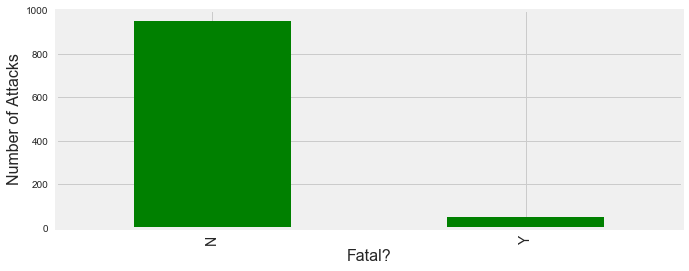

In [29]:
ax = shark['Fatal'].value_counts().plot(kind='bar', figsize=(10,4), color='green');
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.set_xlabel('Fatal?', fontsize=16);
ax.tick_params(axis='x', labelsize=14)
shark['Fatal'].value_counts()

### 95.19% of attacks are Non-Fatal. This is the benchmark for our model.

#### Plotted correlation as a test (even though it's categorical data), just to see if anything stood out.

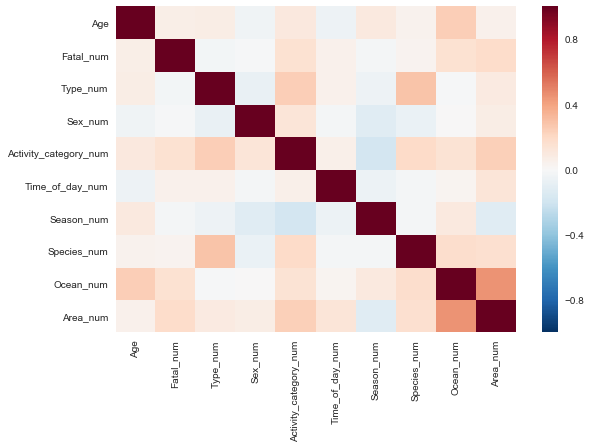

In [30]:
sns.heatmap(shark.corr())

#### Separating Fatal and Nonfatal into two variables, so they can be stacked in a graph.

In [31]:
shark.loc[shark['Fatal'].str.contains('N', case=False), 'Fatal_N'] = 1
shark.loc[shark['Fatal'].str.contains('Y', case=False), 'Fatal_N'] = 0
shark.loc[shark['Fatal'].str.contains('Y', case=False), 'Fatal_Y'] = 1
shark.loc[shark['Fatal'].str.contains('N', case=False), 'Fatal_Y'] = 0
shark[['Fatal', 'Fatal_N', 'Fatal_Y']].tail(10)

,Fatal,Fatal_N,Fatal_Y
4751,Y,0.0,1.0
4932,N,1.0,0.0
5107,N,1.0,0.0
5160,Y,0.0,1.0
5165,Y,0.0,1.0
5341,Y,0.0,1.0
5467,Y,0.0,1.0
5478,Y,0.0,1.0
5681,Y,0.0,1.0
5763,N,1.0,0.0


#### Gender Breakdown 
#### Fatality: Even. 4% Female, 5% Male




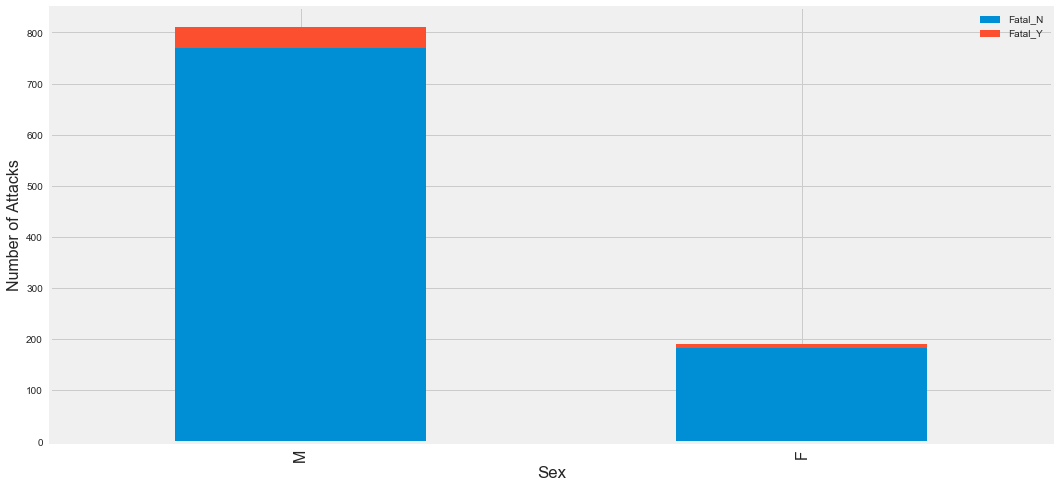

In [32]:
shark_sex = shark[['Sex', 'Fatal_N', 'Fatal_Y']]

ax = shark_sex.groupby('Sex').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)


#### Age Breakdown 
#### Fatality: Generally increasing with age. Under 10 2%, 10-29 4%, 30-49 5%, 50-69 8%, and 70-89 17%.


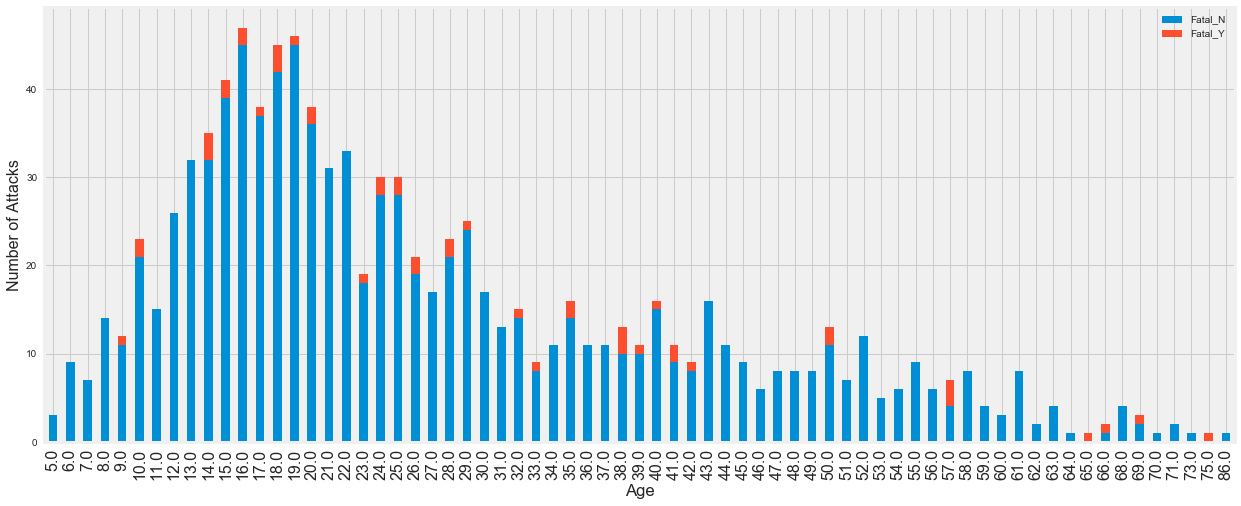

In [33]:
shark_age = shark[['Age', 'Fatal_N', 'Fatal_Y']]

ax = shark_age.groupby('Age').sum().plot(kind='bar', figsize=(19,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### Type Breakdown 
#### Fatality: Provoked attacks have favorable outcome. Provoked 2% fatality, Unprovoked 5%


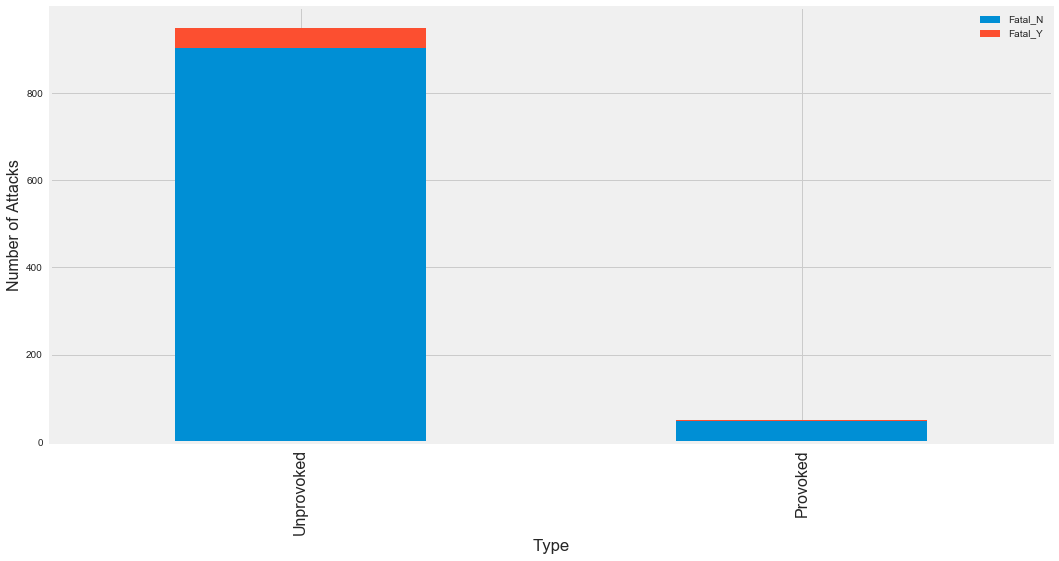

In [35]:
shark_type = shark[['Type', 'Fatal_N', 'Fatal_Y']]

ax = shark_type.groupby('Type').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### Activity Breakdown 
#### Fatality: Highest fatality for Other (18%) and Snorkeling (10%), lowest for surfing (1%) and boating (0%)


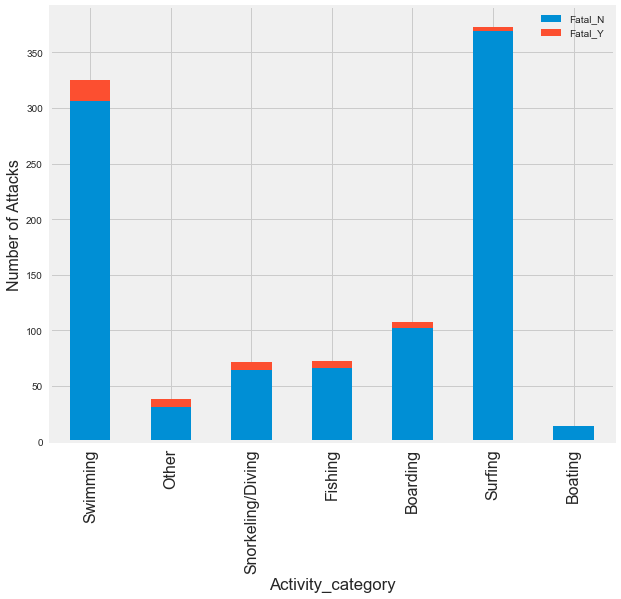

In [38]:
shark_activity = shark[['Activity_category', 'Fatal_N', 'Fatal_Y']]

ax =shark_activity.groupby('Activity_category').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(9,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### Time Breakdown 
#### Fatality: Darker hours most dangerous. Night 24% fatality, Early morning 10% fatality.


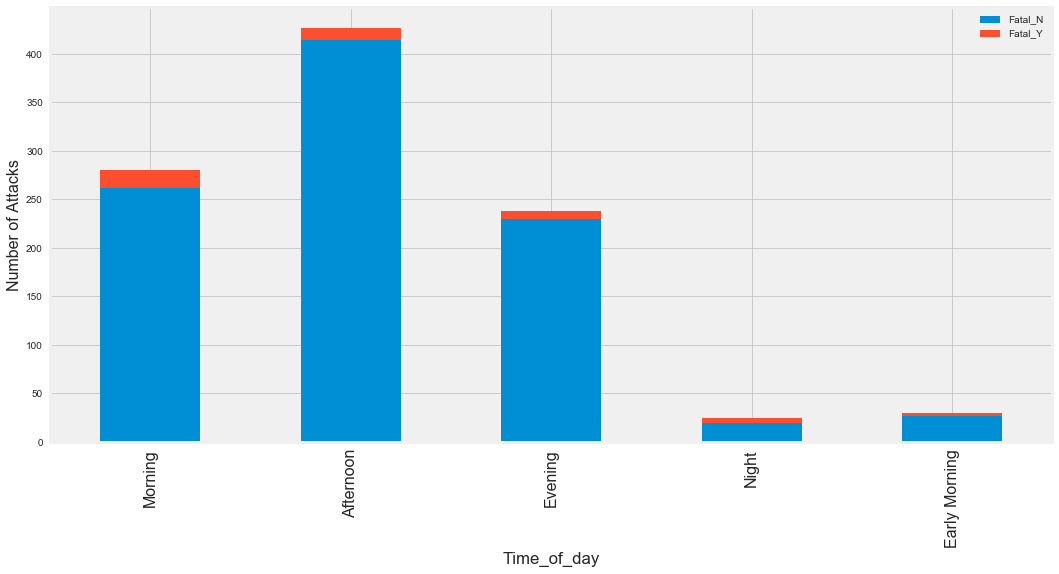

In [37]:
shark_time = shark[['Time_of_day', 'Fatal_N', 'Fatal_Y']]

ax = shark_time.groupby('Time_of_day').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### Season Breakdown 
#### Fatality: Colder months have highest probability of deadly attack. Winter 11%, Spring 3%, Summer 6%, and Fall 4%.


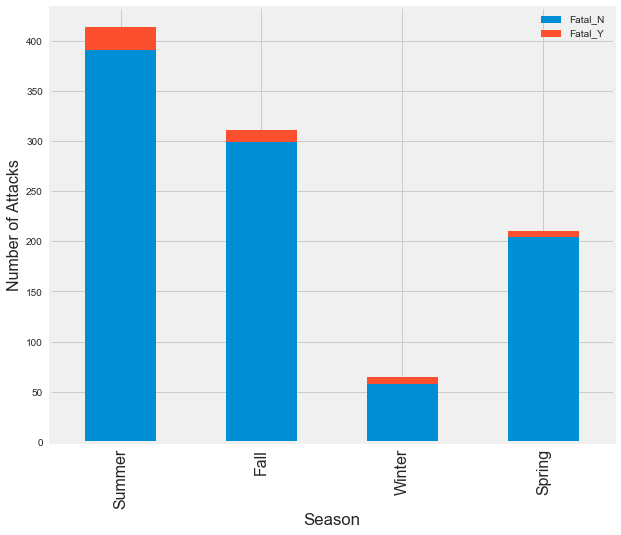

In [36]:
shark_season = shark[['Season', 'Fatal_N', 'Fatal_Y']]

ax = shark_season.groupby('Season').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(9,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### Species Breakdown 
#### Fatality: Most attacks have no Species listed, but only 3% are fatal. Mako Sharks have 14%, White Sharks have 13%, Bull Sharks have 10%, Tiger Sharks have 9%, and Hammerheads have 6%. All other species listed have 0 fatalities.


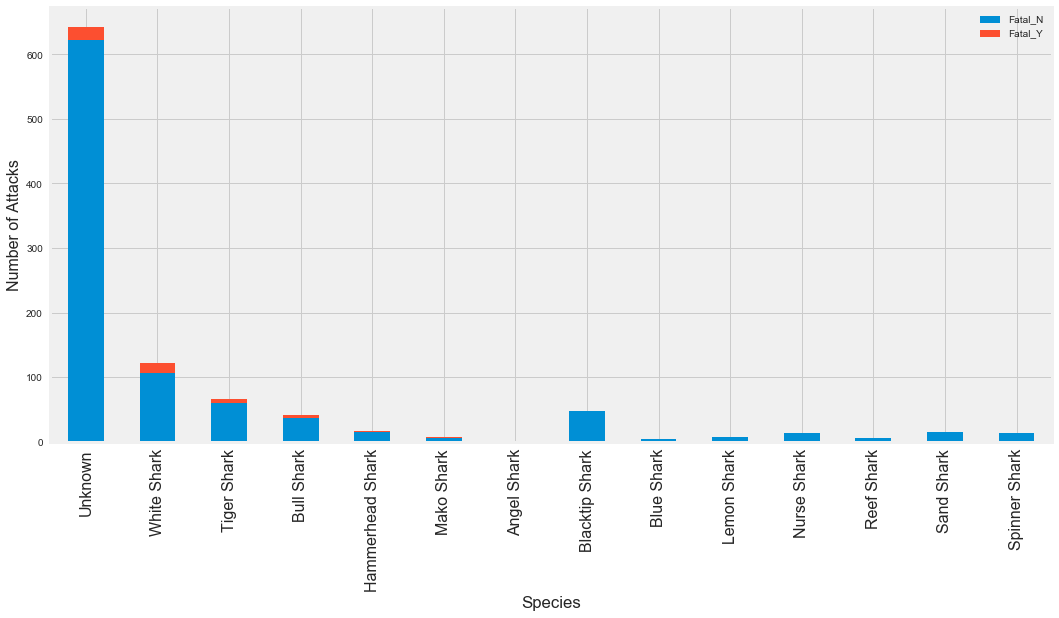

In [39]:
shark_species = shark[['Species', 'Fatal_N', 'Fatal_Y']]

ax = shark_species.groupby('Species').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### Ocean Breakdown 
#### Fatality: Even though most attacks in Gulf, Atlantic and Pacific have a 9% fatality chance, and the Gulf is 2%.


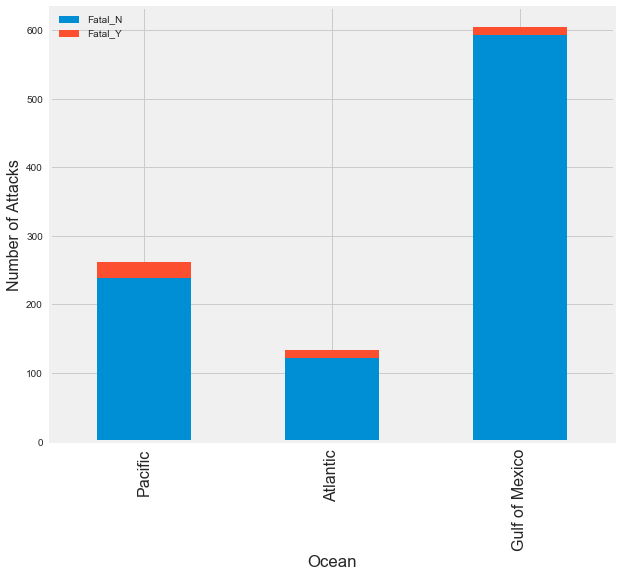

In [37]:
shark_ocean = shark[['Ocean', 'Fatal_N', 'Fatal_Y']]

ax = shark_ocean.groupby('Ocean').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(9,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### State Breakdown 
#### Fatality: States with most attacks are FL (2% fatal), CA (11% fatal), HI (9% fatal). States like SC has 0% fatality and MD has 100% fatality, but other only have 1 attack in the dataset.


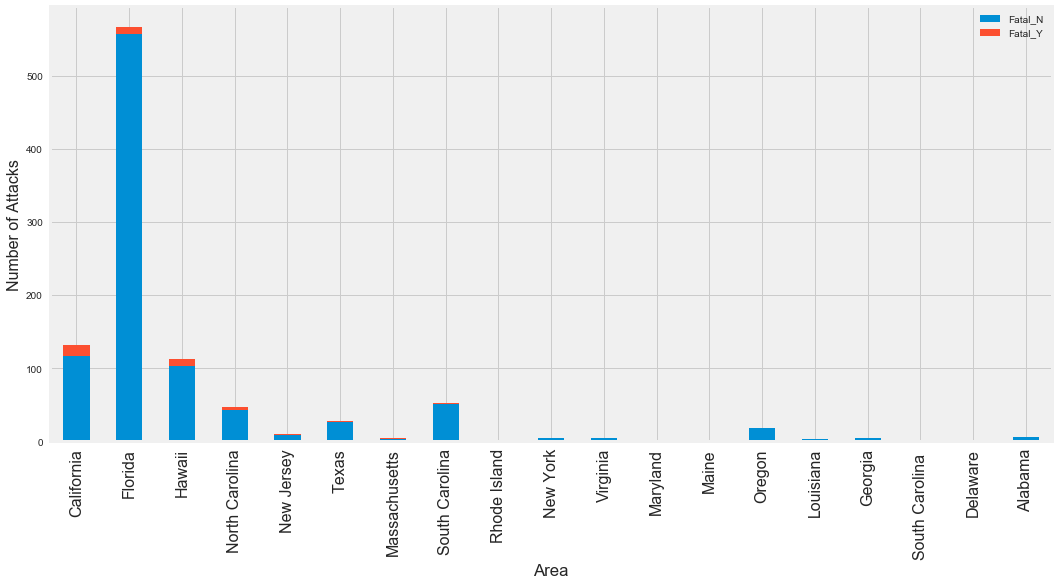

In [317]:
shark_area = shark[['Area', 'Fatal_N', 'Fatal_Y']]

ax = shark_area.groupby('Area').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

## Step 4: Creating a Model

#### Split into X vs Y, and train vs test

In [274]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = ['Type_num', 'Time_of_day_num', 'Age',
                'Season_num', 'Species_num', 'Area_num',
                'Ocean_num', 'Activity_category_num']
X = shark[feature_cols]
y = shark.Fatal_num

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

#### KNN Classification

In [276]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance', 
                           algorithm  = 'kd_tree', leaf_size = 10)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [277]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class))*100),"% accuracy using KNN"


96.0 % accuracy using KNN


#### Logistic Regression

In [318]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [321]:
y_pred_class = LR.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class))
      *100),"% accuracy using Logistic Regression"

96.5 % accuracy using Logistic Regression


#### Decision Tree Classifier

In [325]:
treeclf = DecisionTreeClassifier(max_depth=9, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [326]:
y_pred_class = treeclf.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class))
      *100),"% accuracy using Decision Tree Classification"

98.5 % accuracy using Decision Tree Classification


In [322]:
pd.DataFrame({'feature':feature_cols, 
              'importance':treeclf.feature_importances_})
.sort_values('importance', ascending=False)

,feature,importance
2,Age,0.333886
1,Time_of_day_num,0.169385
7,Activity_category_num,0.156238
5,Area_num,0.155471
4,Species_num,0.100785
3,Season_num,0.048688
0,Type_num,0.023147
6,Ocean_num,0.012400


#### exporting the decision tree

In [282]:
from sklearn.tree import export_graphviz

In [283]:
export_graphviz(treeclf, out_file='./tree/tree1.dot', feature_names=feature_cols)

## Step 5: Production


##### Sex: F, Activity: Swimming, Age: 26, Area: California, Ocean: Pacific, Type: Unprovoked, Time: Afternoon, Season: Fall, Species: White

In [243]:
treeclf.predict(np.array([1, 1, 26.0, 3, 1, 4, 2, 2]).reshape(1, -1))

array([0], dtype=int64)

##### Sex: M, Activity: Snorkeling, Age: 65, Area: Hawaii, Ocean: Pacific, Type: Unprovoked, Time: Early Morning, Season: Spring, Species: Tiger

In [298]:
treeclf.predict(np.array([0, 0, 65.0, 1, 0, 2, 2, 3]).reshape(1, -1))

array([1], dtype=int64)